In [1]:
## 준비) 모듈 및 데이터 불러오기
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

iris = sns.load_dataset('iris')
print("Data Type of Iris:", type(iris), "\n")
print("Iris Dataset: \n", iris.head()) 

Data Type of Iris: <class 'pandas.core.frame.DataFrame'> 

Iris Dataset: 
    sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [2]:
##1 데이터 분리
#(1) feature와 label의 분리
X_iris = iris.iloc[:,:-1]
y_iris = iris.iloc[:,-1]
from sklearn.model_selection import train_test_split
Train_X, Test_X , Train_y , Test_y = train_test_split(X_iris, y_iris, test_size = 0.3, random_state = 1) 
# random_state: 난수 시드값

print("Train_X's shape:", Train_X.shape, ",\t Train_y's shape:", Train_y.shape)
print("Test_X's shape:", Test_X.shape, ",\t Test_y's shape:", Test_y.shape) # 150*0.3 = 45
print('\nhead of Train_X:\n', Train_X.head())

Train_X's shape: (105, 4) ,	 Train_y's shape: (105,)
Test_X's shape: (45, 4) ,	 Test_y's shape: (45,)

head of Train_X:
      sepal_length  sepal_width  petal_length  petal_width
118           7.7          2.6           6.9          2.3
18            5.7          3.8           1.7          0.3
4             5.0          3.6           1.4          0.2
45            4.8          3.0           1.4          0.3
59            5.2          2.7           3.9          1.4


In [3]:
##3. kNN 모델 인스턴스화 및 파라미터 설정
from sklearn.neighbors import KNeighborsClassifier
model_kNN = KNeighborsClassifier(n_neighbors=5, metric="euclidean")

In [4]:
##4. kNN 모델 학습
model_kNN.fit(Train_X, Train_y) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [5]:
##5. kNN 모델 적용
predicted_kNN = model_kNN.predict(Test_X)

In [6]:
##6. kNN 모델 평가
from sklearn.metrics import *
print("\n 1. confusion matrix\n", confusion_matrix(Test_y, predicted_kNN))
print("\n 2. classification report\n", classification_report(Test_y, predicted_kNN))

res_kNN = []
res_kNN.append([accuracy_score(Test_y, predicted_kNN),
               precision_score(Test_y, predicted_kNN, average = "macro"),
               recall_score(Test_y, predicted_kNN, average = "macro"),
               f1_score(Test_y, predicted_kNN, average = "macro")])

print("\n3. performance measurements for classification model")
pd.DataFrame(res_kNN, columns = ["Accuracy", "Precision", "Recall", "F1-score"], index=['kNN'])



 1. confusion matrix
 [[14  0  0]
 [ 0 18  0]
 [ 0  1 12]]

 2. classification report
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.95      1.00      0.97        18
   virginica       1.00      0.92      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45


3. performance measurements for classification model


,Accuracy,Precision,Recall,F1-score
kNN,0.977778,0.982456,0.974359,0.977658


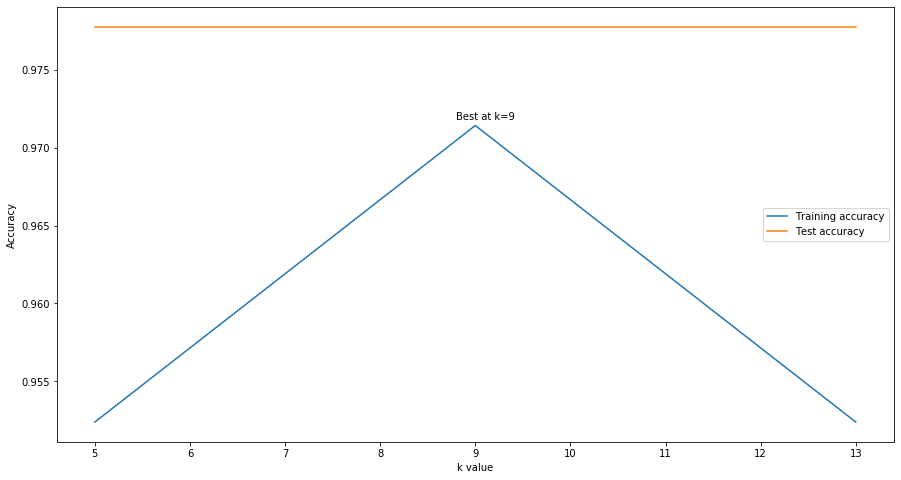

In [7]:
##추가. Best K 찾기(정확도 기준)
training_accuracy = []
test_accuracy = []

# 3에서 13까지 n_neighbors를 적용
neighbors_range = range(5, 14, 2) # 짝수인 k값은 일반적으로 잘 사용하지 않음

for n_neighbors in neighbors_range:
    kNN = KNeighborsClassifier(n_neighbors=n_neighbors)
    kNN.fit(Train_X, Train_y)
    training_accuracy.append(kNN.score(Train_X, Train_y)) # 학습 데이터에 대한 분류 정확도
    test_accuracy.append(kNN.score(Test_X, Test_y)) # 평가 데이터에 대한 분류 정확도
plt.rcParams['figure.figsize'] = [15, 8]
plt.plot(neighbors_range, training_accuracy, label="Training accuracy")
plt.plot(neighbors_range, test_accuracy, label="Test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("k value")
plt.text(np.arange(5, 14, 2)[training_accuracy== max(training_accuracy)]-0.2,
         max(training_accuracy)+0.0004, "Best at k=9")
plt.legend()
plt.show()

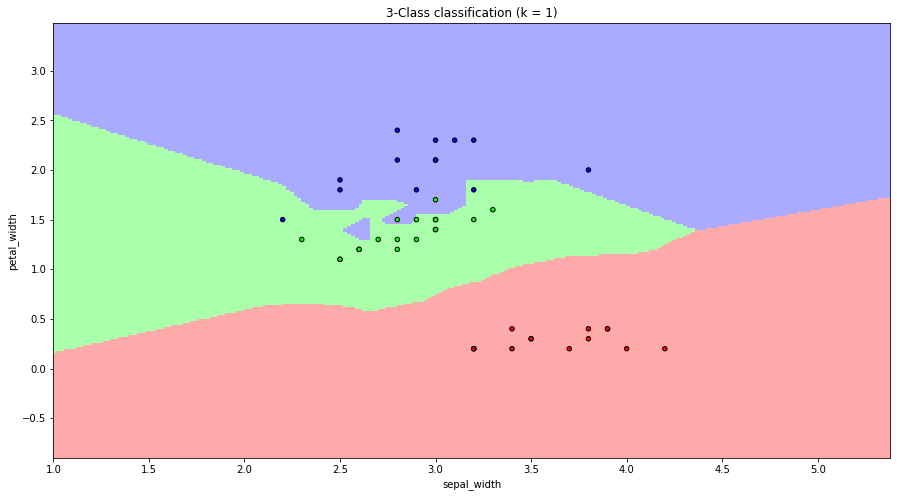

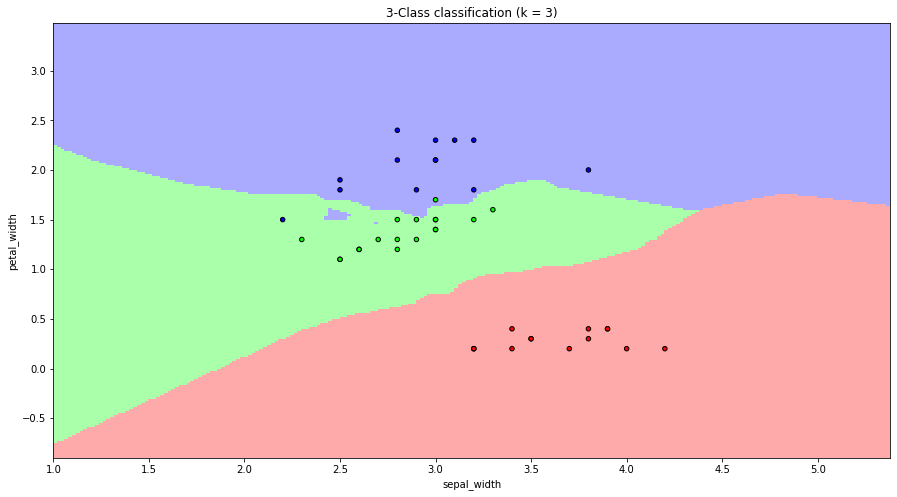

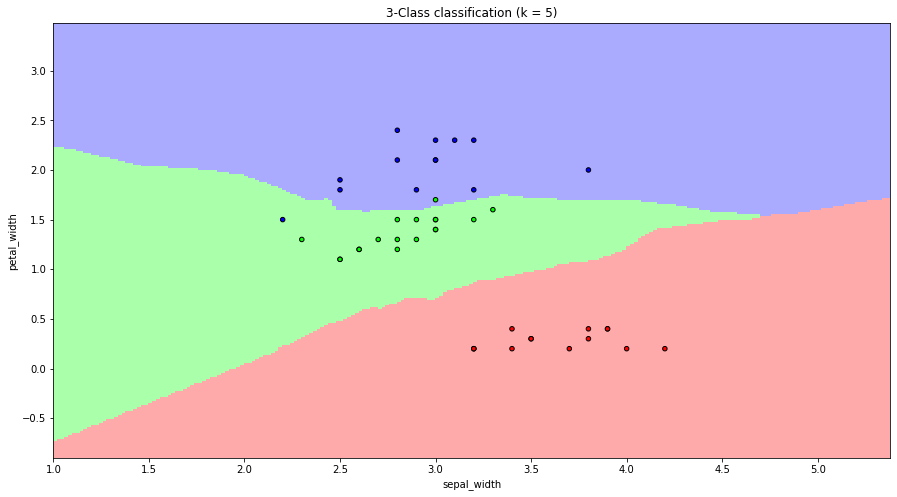

In [8]:
#추가. kNN 모델 평가 결과(2차원 시각화)
from sklearn import preprocessing
from matplotlib.colors import ListedColormap

le = preprocessing.LabelEncoder()
le.fit(Train_y.unique())

Train_X_2d = np.array(Train_X)[:, [1,3]] # 3차원은 시각화하기 어렵기 때문에 2차원으로 특징을 임의로 선택했음
Train_y_to_int = le.transform(Train_y) # iris의 label을 각각 0, 1, 2로 변환

Test_X_2d = np.array(Test_X)[:, [1,3]]
Test_y_to_int = le.transform(Test_y)
h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for n_neighbor in [1, 3, 5]:
    knn = KNeighborsClassifier(n_neighbor)
    knn.fit(Train_X_2d, Train_y_to_int)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = Train_X_2d[:, 0].min() - 1, Train_X_2d[:, 0].max() + 1
    y_min, y_max = Train_X_2d[:, 1].min() - 1, Train_X_2d[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(Test_X_2d[:, 0], Test_X_2d[:, 1], c=Test_y_to_int, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel(Train_X.columns[1])
    plt.ylabel(Train_X.columns[3])
    plt.title("3-Class classification (k = %i)"
              % (n_neighbor))

plt.show()